In [1]:
from sage.graphs.graph import Graph
from sage.graphs.independent_sets import IndependentSets

# Python Visualization/Calculation libraries
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Caching
from functools import lru_cache

In [2]:
def perfect_binary_tree_generator(n):
    if n == 0:
        return Graph()
    else:
        g = Graph()
        g.add_vertices([2^n])
        for i in range(2^n - 1):
            g.add_edge(i, 2*i + 2, f'{i} to {2*i + 1}')
            g.add_edge(i, 2*i + 1,  f'{i} to {2*i + 1}')
        return g
    
def get_leaves(n):
    num_vertices = 2^(n + 1) - 1
    leaves = []
    last_row_start = floor(num_vertices / 2)
    
    for vertex in range(last_row_start, num_vertices):
        leaves.append(vertex)
    
    return leaves

In [3]:
depth = 4

tree = perfect_binary_tree_generator(depth)
leaves = get_leaves(depth)
leaves

[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

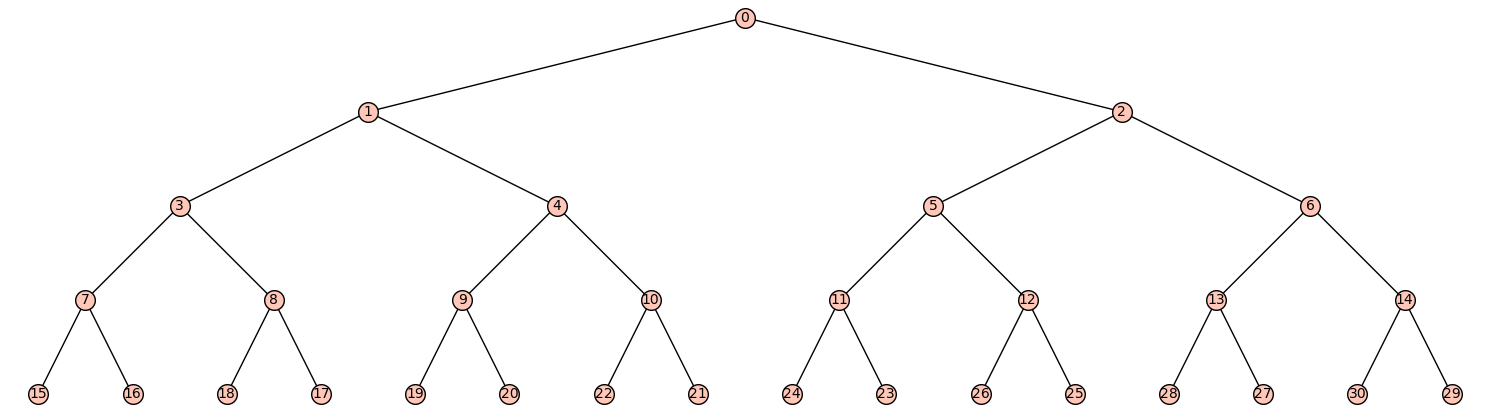

In [4]:
def perfect_binary_tree_plot():
    tree_layout = tree.layout(layout='tree', orientation='bottom-top')
    tree.show(layout="tree", tree_root=0, figsize=[15, 15]) # 8x8 inches

perfect_binary_tree_plot()

In [5]:
def is_rooted_at(v, arr):
#     print(f'This is the leaf: {v}')
    return list(i for i in arr if v in i)

def get_num_vertices(depth):
    return pow(depth + 1, 2) - 1

In [6]:
max_independent_set = tree.independent_set() # I think this shows the maximal. Doc: https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/graph.html#sage.graphs.graph.Graph.independent_set
print(max_independent_set)
len(max_independent_set)

[16, 0, 3, 5, 15, 20, 19, 4, 6, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


21

In [7]:
def get_max_num(depth):
    tree = perfect_binary_tree_generator(depth)
    max_independent_set = tree.independent_set()
    print(f"Depth: {depth}, Num of vertices: {2^(depth + 1) - 1} , Alpha: {len(max_independent_set)} \n")

In [8]:
for i in range(5, 26):
    get_max_num(i)

Depth: 5, Num of vertices: 63 , Alpha: 42 

Depth: 6, Num of vertices: 127 , Alpha: 85 

Depth: 7, Num of vertices: 255 , Alpha: 170 

Depth: 8, Num of vertices: 511 , Alpha: 341 

Depth: 9, Num of vertices: 1023 , Alpha: 682 

Depth: 10, Num of vertices: 2047 , Alpha: 1365 

Depth: 11, Num of vertices: 4095 , Alpha: 2730 

Depth: 12, Num of vertices: 8191 , Alpha: 5461 

Depth: 13, Num of vertices: 16383 , Alpha: 10922 

Depth: 14, Num of vertices: 32767 , Alpha: 21845 

Depth: 15, Num of vertices: 65535 , Alpha: 43690 

Depth: 16, Num of vertices: 131071 , Alpha: 87381 

Depth: 17, Num of vertices: 262143 , Alpha: 174762 



KeyboardInterrupt: 

In [9]:
@lru_cache(maxsize=None) # Unlimited cache size
def specific_coclique_size(n):
    is_n = (x for x in IndependentSets(tree) if len(x) == n)
    is_n = list(is_n)

    return is_n

In [ ]:

# # Use this cell to generate large amounts of cocliques and then the specific_coclique_size function will be cached

coclique_sizes = np.array(range(1, len(max_independent_set) + 1))
cocliques = np.asarray(list(specific_coclique_size(i) for i in coclique_sizes), dtype="object")
# Shape: 3 Dimensional array. The first index is the size of the coclique, the second index is the index of the size of the coclique
# cocliques[5] # This will give you a 2D array of all cocliques of size 5

In [ ]:
test = specific_coclique_size(40)
print(len(test))

In [ ]:
def plot_coclique_vertices_size(curr_coclique_size: int):
    tree_vertices = np.array(range(get_num_vertices(depth)))
    print(tree_vertices)
    curr_coclique = specific_coclique_size(40) # Get cocliques of size curr_coclique_size
    
    coclique_vertices = [vertex for coclique in curr_coclique for vertex in coclique]

    # Count the occurrences of each vertex in the cocliques
    vertex_counts = Counter(coclique_vertices)

    # Get the count of each vertex in tree_vertices, which will be 0 for vertices that do not appear in the cocliques
    vertex_counts = [vertex_counts.get(vertex, 0) for vertex in tree_vertices]

    plt.plot(tree_vertices, vertex_counts)
    plt.xlabel("Vertices")
    plt.ylabel("Frequence of Appearance")
    plt.ylim(bottom=0) 
    plt.title(f"Coclique size of {curr_coclique_size}")
    plt.show()

In [ ]:
def plot_coclique_vertices_size(curr_coclique_size: int):
    tree_vertices = np.array(range(get_num_vertices(depth)))
    print(tree_vertices)
    curr_coclique = cocliques[curr_coclique_size - 1] # Get cocliques of size curr_coclique_size
    
    coclique_vertices = [vertex for coclique in curr_coclique for vertex in coclique]

    # Count the occurrences of each vertex in the cocliques
    vertex_counts = Counter(coclique_vertices)

    # Get the count of each vertex in tree_vertices, which will be 0 for vertices that do not appear in the cocliques
    vertex_counts = [vertex_counts.get(vertex, 0) for vertex in tree_vertices]

    plt.plot(tree_vertices, vertex_counts)
    plt.xlabel("Vertices")
    plt.ylabel("Frequence of Appearance")
    plt.ylim(bottom=0) 
    plt.title(f"Coclique size of {curr_coclique_size}")
    plt.show()

In [ ]:
# plot_coclique_vertices_size(10)

In [ ]:
# for i in range(1, len(max_independent_set) + 1):
#     plot_coclique_vertices_size(i)
#     print(leaves)